In [66]:
import pandas as pd

from geopy.geocoders import Photon

# Загрузка данных

In [67]:
data = pd.read_excel('data/data_ford_price.xlsx') 

# Обработка географических данных

Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

In [68]:
geolocator = Photon(user_agent="measurements")

Объединим широту и долготу для поиска адреса нулевого объекта:

In [69]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Roller Drive, 37663, Kingsport, Tennessee, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

In [70]:
address = location.raw
address

{'geometry': {'coordinates': [-82.4825765, 36.4700125], 'type': 'Point'},
 'type': 'Feature',
 'properties': {'osm_id': 19621117,
  'extent': [-82.4840232, 36.4715824, -82.4815338, 36.4688041],
  'country': 'United States',
  'city': 'Kingsport',
  'countrycode': 'US',
  'postcode': '37663',
  'county': 'Sullivan',
  'type': 'street',
  'osm_type': 'W',
  'osm_key': 'highway',
  'osm_value': 'residential',
  'name': 'Roller Drive',
  'state': 'Tennessee'}}

# Отрисовка карты

In [71]:
#!pip install geopandas
#!pip install shapely

In [72]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

Отметим расположение объектов нашей выборки зелёным цветом.

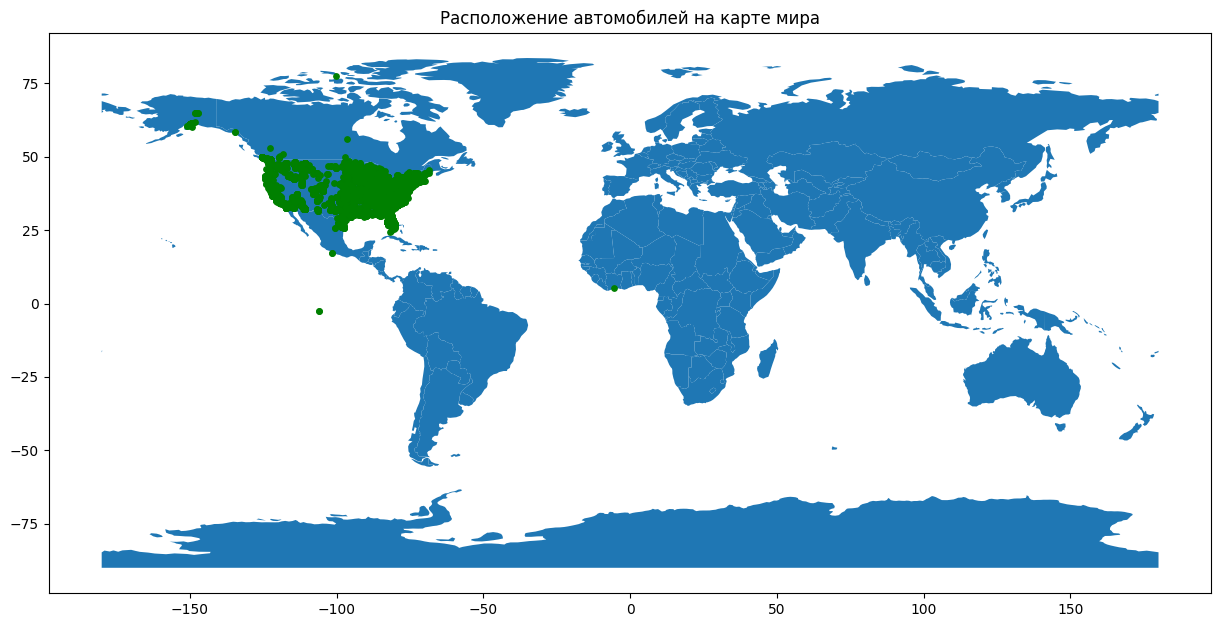

In [73]:
import geopandas as gpd

url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"

world = gpd.read_file(url)

geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 

gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

Отметим расположение объектов нашей выборки зелёным цветом.

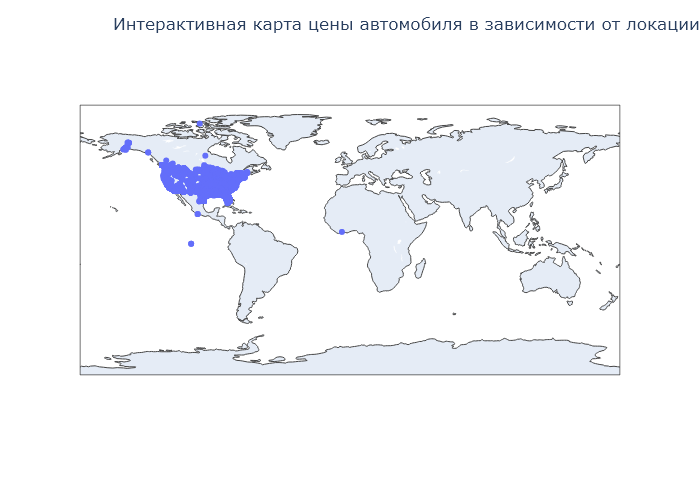

In [74]:
import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show('png')